In [17]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv('data3.csv')
df = df.astype(float)
df.head()

,ID MCA,GENDER,TIME OF DISEASE (y),AGE (y),BODY MASS (Kg),HEGHT (m),Numbness,Burn,needl,Prick,rest,walk,ulcer,amput,Vibracao,tatil,DeformToes,Halux,Arch,CalusCrack,DISEASE intensity
0,1.0,2.0,17.0,61.0,80.5,1.760,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
1,2.0,2.0,11.0,65.0,70.5,1.616,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,5.0,0.0,1.0,1.0,0.0,3.0
2,3.0,2.0,25.0,54.0,48.2,1.490,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,2.0
3,4.0,2.0,25.0,55.0,83.5,1.755,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
4,5.0,2.0,13.0,64.0,47.1,1.535,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID MCA               208 non-null    float64
 1   GENDER               204 non-null    float64
 2   TIME OF DISEASE (y)  203 non-null    float64
 3   AGE (y)              206 non-null    float64
 4   BODY MASS (Kg)       205 non-null    float64
 5   HEGHT (m)            205 non-null    float64
 6   Numbness             208 non-null    float64
 7   Burn                 208 non-null    float64
 8   needl                208 non-null    float64
 9   Prick                208 non-null    float64
 10  rest                 208 non-null    float64
 11  walk                 208 non-null    float64
 12  ulcer                208 non-null    float64
 13  amput                208 non-null    float64
 14  Vibracao             208 non-null    float64
 15  tatil                208 non-null    flo

In [4]:
col_list= ['Numbness','Burn','needl','Prick',
         'rest','walk','ulcer','amput','Vibracao','tatil','DeformToes','Halux','Arch','CalusCrack']
df['All Symptom'] = df[col_list].sum(axis=1)

In [5]:
df.drop_duplicates(subset=['ID MCA'])
df = df[['ID MCA', 'GENDER', 'TIME OF DISEASE (y)', 'AGE (y)', 'BODY MASS (Kg)',
        'HEGHT (m)','Numbness', 'Burn', 'needl', 'Prick', 'rest', 'walk',
       'ulcer', 'amput', 'Vibracao', 'tatil', 'DeformToes', 'Halux', 'Arch',
       'CalusCrack', 'All Symptom', 'DISEASE intensity']]

In [6]:
df.head()

,ID MCA,GENDER,TIME OF DISEASE (y),AGE (y),BODY MASS (Kg),HEGHT (m),Numbness,Burn,needl,Prick,rest,walk,ulcer,amput,Vibracao,tatil,DeformToes,Halux,Arch,CalusCrack,All Symptom,DISEASE intensity
0,1.0,2.0,17.0,61.0,80.5,1.760,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0
1,2.0,2.0,11.0,65.0,70.5,1.616,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,5.0,0.0,1.0,1.0,0.0,13.0,3.0
2,3.0,2.0,25.0,54.0,48.2,1.490,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,10.0,2.0
3,4.0,2.0,25.0,55.0,83.5,1.755,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.0,2.0
4,5.0,2.0,13.0,64.0,47.1,1.535,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,7.0,2.0


In [7]:
df.dropna(how='any', inplace=True)

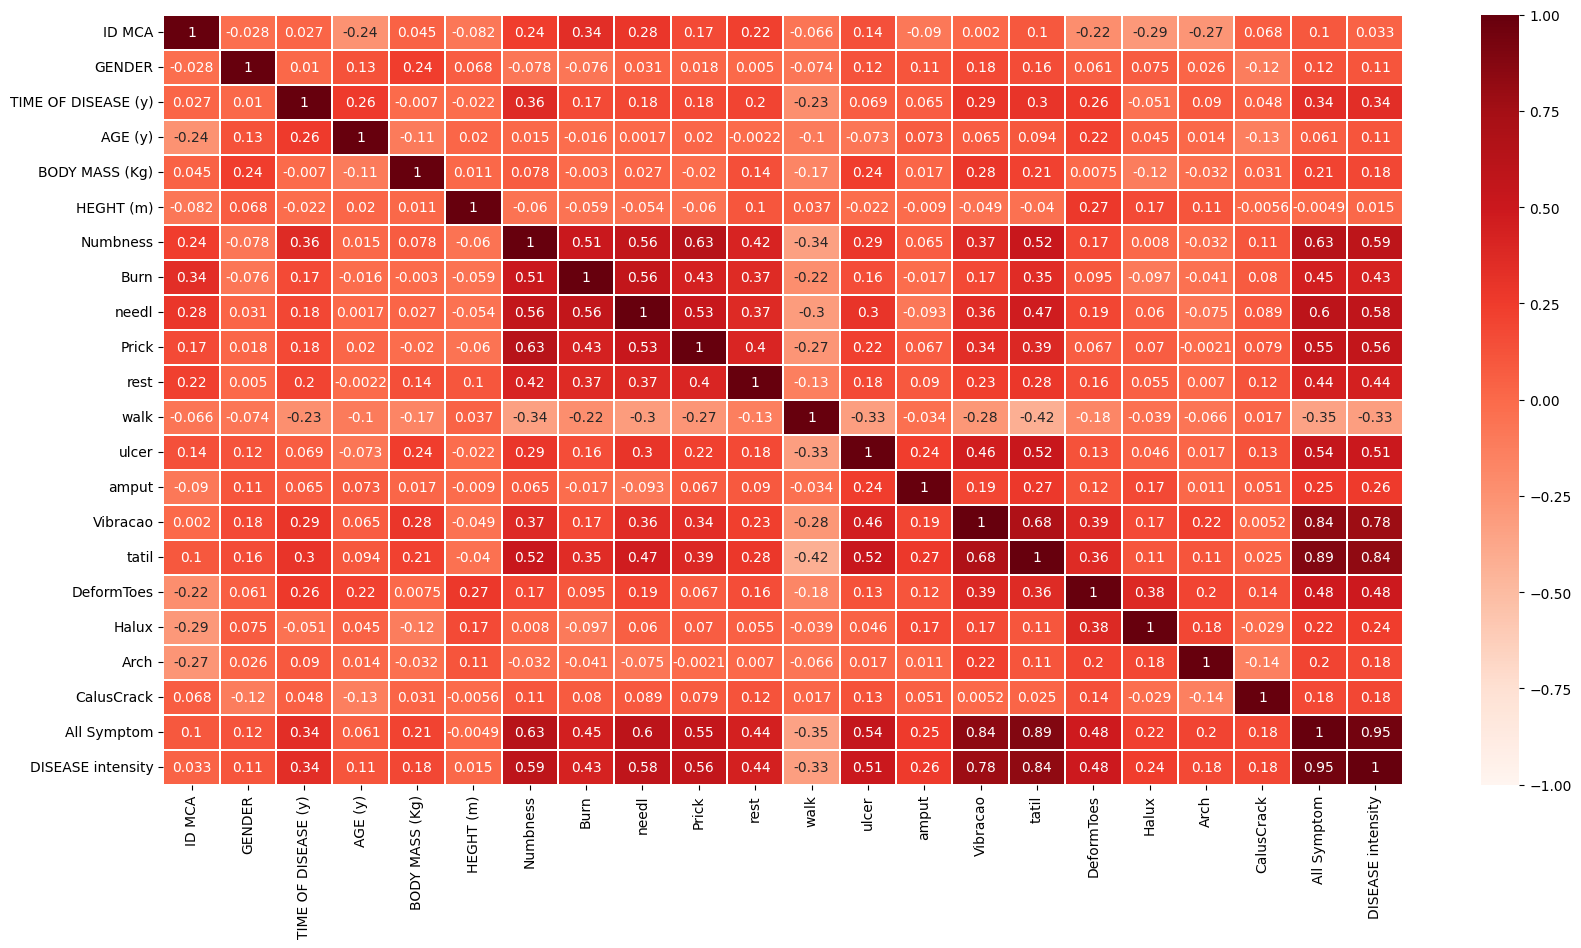

In [18]:
plt.figure(figsize = (20,10))

sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="Reds",  annot=True, linewidth = 0.1)

plt.show()

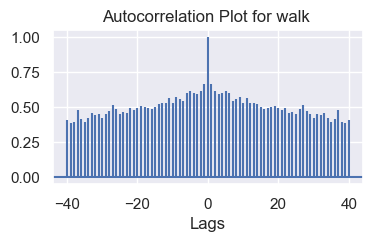

In [53]:
plt.figure(figsize=(4, 2))

plt.title("Autocorrelation Plot for walk ")

plt.xlabel("Lags")

plt.acorr(df['TIME OF DISEASE (y)'] , maxlags = 40 )

plt.grid(True)

plt.show()

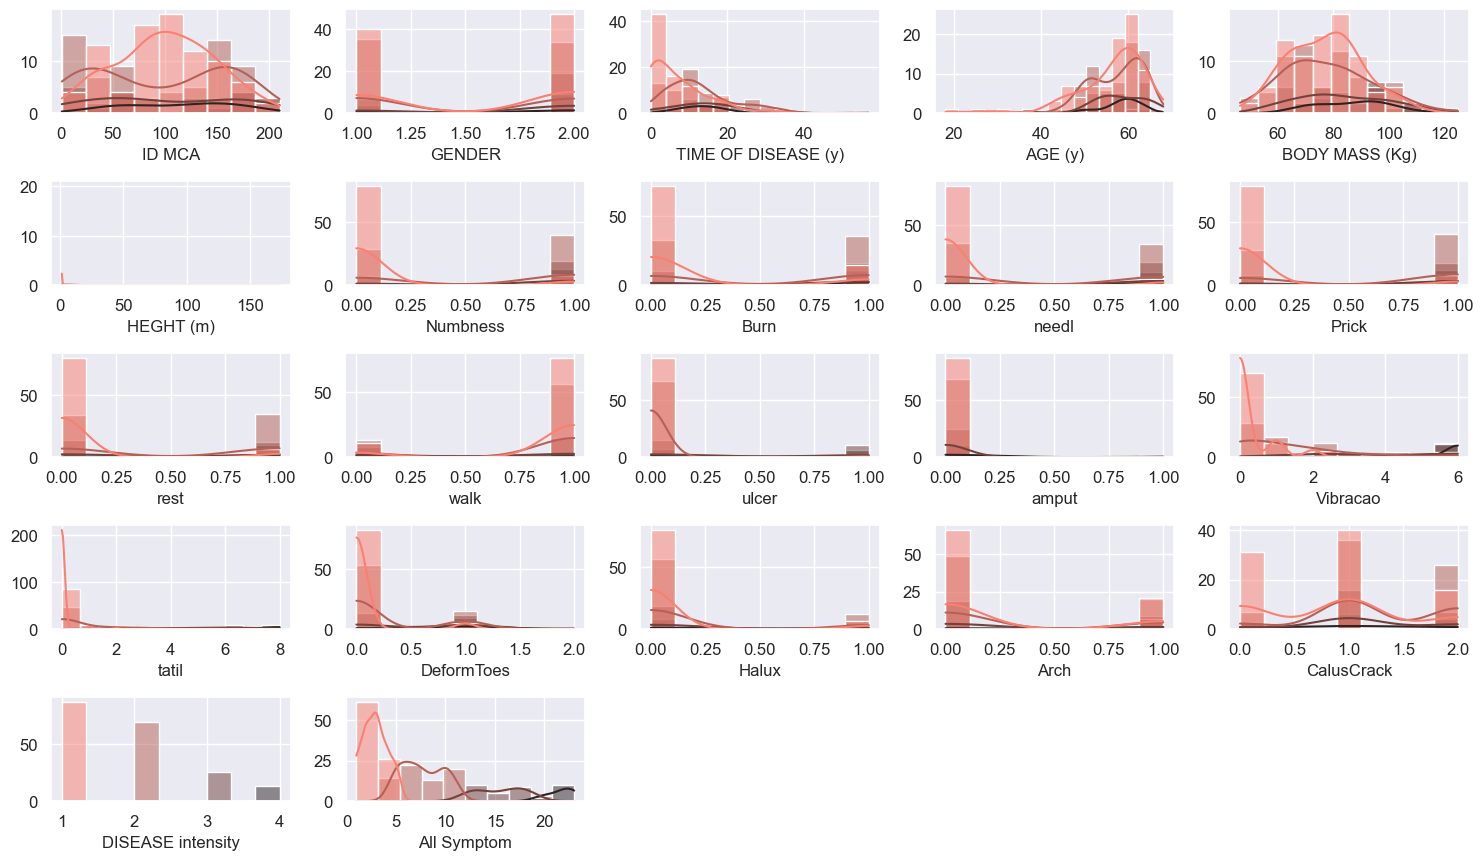

In [9]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
plotnumber = 1


for i in df.columns:
    ax = plt.subplot(6,5, plotnumber)
    ax = sns.histplot(x =i , hue="DISEASE intensity" , data = df, kde=True, palette="dark:salmon_r", legend=False)
    plt.xlabel(i, size = 12)
    plt.xticks(size = 12)
    ax.set_ylabel('')
    plt.ylabel('', size = 12)
    plt.yticks(size = 12)
    plotnumber += 1
    plt.tight_layout()
    ;

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


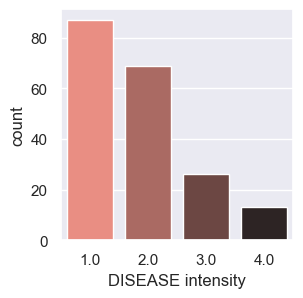

In [48]:
plt.figure(figsize=(3,3))
sns.set(style="darkgrid")
sns.countplot(df['DISEASE intensity'], palette="dark:salmon_r")
plt.show()

2.0    109
1.0     86
Name: GENDER, dtype: int64


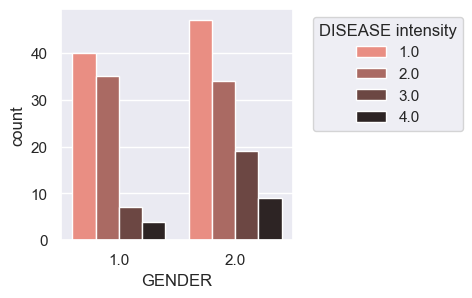

In [49]:
plt.figure(figsize=(3,3))
sns.set(style="darkgrid")

sns.countplot(x = df['GENDER'] , hue = "DISEASE intensity" , data = df, palette="dark:salmon_r")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title="DISEASE intensity")
print(df['GENDER'].value_counts())

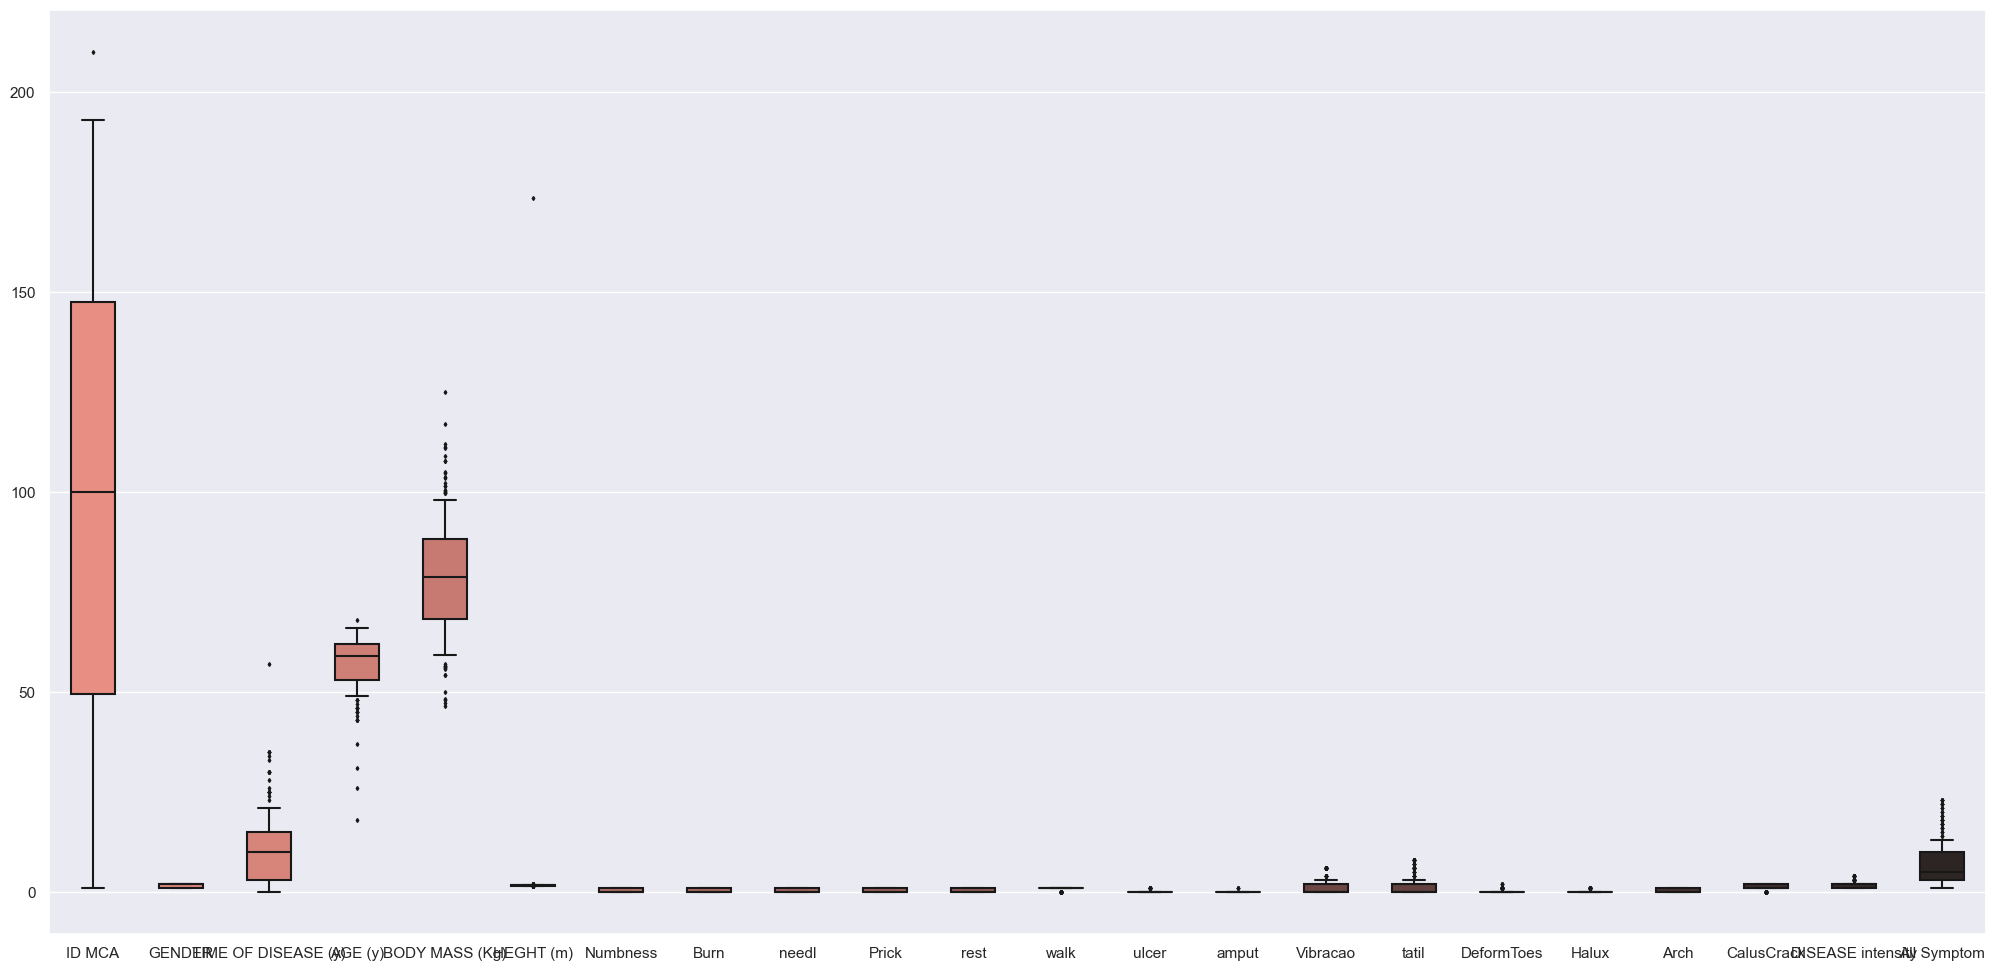

In [51]:
plt.figure(figsize = (25,12))

sns.boxplot(data=df, width=0.5, fliersize=2, whis=0.5 , palette="dark:salmon_r")

plt.show()

In [26]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X = df[['ID MCA', 'GENDER', 'TIME OF DISEASE (y)', 'AGE (y)', 'BODY MASS (Kg)',
        'HEGHT (m)','Numbness', 'Burn', 'needl', 'Prick', 'rest', 'walk',
       'ulcer', 'amput', 'Vibracao', 'tatil', 'DeformToes', 'Halux', 'Arch',
       'CalusCrack', 'All Symptom']]
y= df[['DISEASE intensity']]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 65.89it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
BaggingClassifier                  0.98               0.97    None      0.98   
DecisionTreeClassifier             0.98               0.97    None      0.98   
LGBMClassifier                     0.94               0.91    None      0.94   
RandomForestClassifier             0.89               0.83    None      0.88   
ExtraTreesClassifier               0.86               0.83    None      0.86   
LinearDiscriminantAnalysis         0.80               0.80    None      0.80   
GaussianNB                         0.81               0.75    None      0.80   
NearestCentroid                    0.73               0.73    None      0.74   
AdaBoostClassifier                 0.87               0.72    None      0.84   
ExtraTreeClassifier                0.77               0.70    None      0.77   
SVC                                0.78 

In [8]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

X = df[['ID MCA', 'GENDER', 'TIME OF DISEASE (y)', 'AGE (y)', 'BODY MASS (Kg)',
        'HEGHT (m)','Numbness', 'Burn', 'needl', 'Prick', 'rest', 'walk',
       'ulcer', 'amput', 'Vibracao', 'tatil', 'DeformToes', 'Halux', 'Arch',
       'CalusCrack', 'All Symptom']]
y= df[['DISEASE intensity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9795918367346939


In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[22,  0,  0,  0],
       [ 1, 17,  0,  0],
       [ 0,  0,  4,  0],
       [ 0,  0,  0,  5]], dtype=int64)

AttributeError: module 'matplotlib' has no attribute 'show'

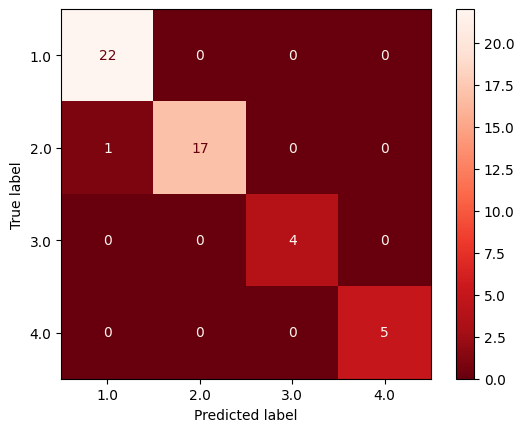

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot(cmap="Reds_r")

plt.show()